# **2. Applying kernels**
<ol>
  <li> Blurring (Gaussian, motion, box) </li>
  <li> Sharpening </li>
</ol>

In [9]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("filter.png")
input_pixels = input_image.load()

# Box Blur kernel
box_kernel = [[1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25]]

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Motion kernel                   
motion_kernel = [[1/5,0,0,0,0],
                 [0,1/5,0,0,0],
                 [0,0,1/5,0,0],
                 [0,0,0,1/5,0],
                 [0,0,0,0,1/5]]

# Sharpening kernel
sharpening_kernel = [[  0  , -0.5 ,    0 ],
                     [-0.5 ,   3  , -0.5 ],
                     [  0  , -0.5 ,    0 ]]



# Select kernel here:
kernel = sharpening_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGBA", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        colorLayerTemp = [0, 0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                colorLayerTemp[0] += pixel[0] * kernel[a][b]
                colorLayerTemp[1] += pixel[1] * kernel[a][b]
                colorLayerTemp[2] += pixel[2] * kernel[a][b]
                colorLayerTemp[3] += pixel[3] * kernel[a][b]

        draw.point((x, y),(int(colorLayerTemp[0]), int(colorLayerTemp[1]), int(colorLayerTemp[2]),int(colorLayerTemp[3])))
  

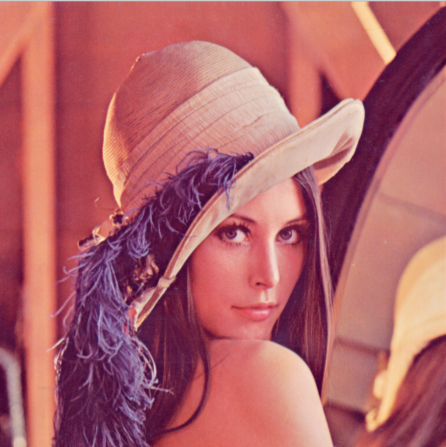

In [11]:
Image.open("filter.png") #Original

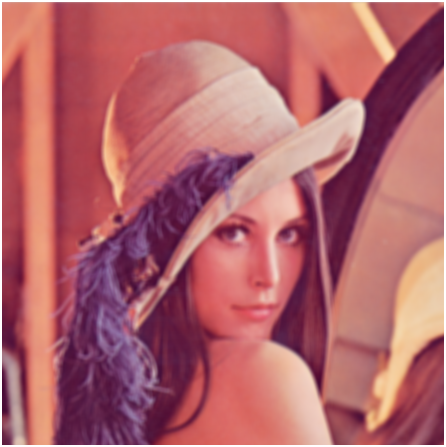

In [4]:
output_image # Box blur

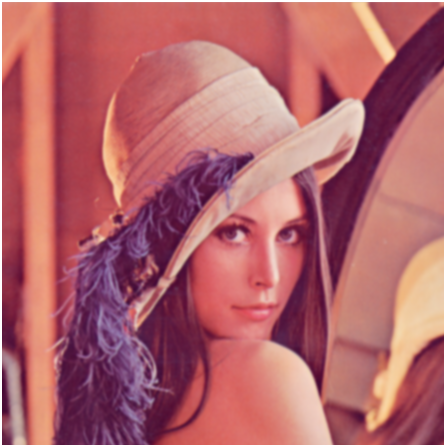

In [6]:
output_image # Gaussian blur

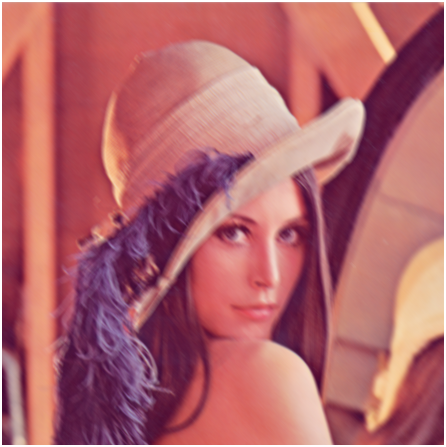

In [8]:
output_image # Motion blur

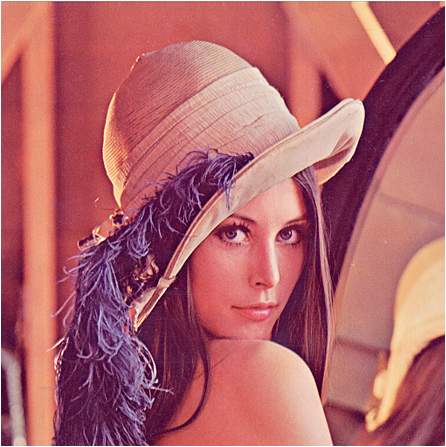

In [10]:
output_image # Sharpening